In [14]:
import matplotlib.pyplot as plt#for plotting
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline

# Splitting data
from sklearn.model_selection import train_test_split

# Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras import layers,models

#Various call backs
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [2]:
#Reading the data and converting the labels to one hot encoded

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('../input/dataset-2',
                                    target_size=(100, 100),
                                    batch_size=21663,
                                    class_mode='categorical',
                                    shuffle=True )

Found 21663 images belonging to 73 classes.


In [6]:
#To resolve an error faced in the next cell
import PIL
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
#seperating the images and labels
X , y = data.next()


In [8]:
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(21663, 100, 100, 3)
Labels shape :(21663, 73)


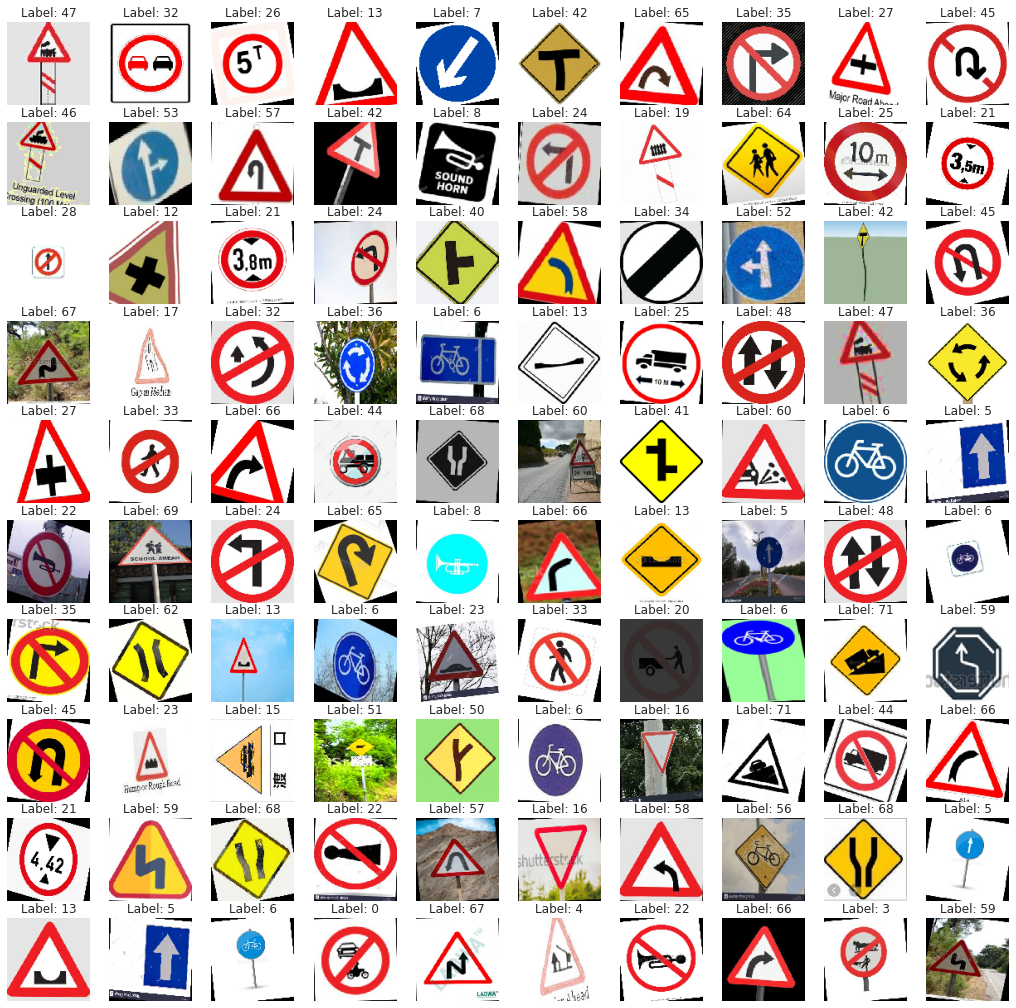

In [10]:
#Plotting images randomly with their true labels
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow((X[r].astype('uint8')))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))
    

In [12]:
#Splitting the dataset to test set and train set(20% test and 80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [13]:
#Printing the shapes of test and train sets
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (17330, 100, 100, 3)
Test Shape : (4333, 100, 100, 3)


In [15]:
#Sequential Model

mode = models.Sequential()
mode.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
mode.add(Dropout(0.5))
mode.add(layers.MaxPooling2D((2,2)))



mode.add(layers.Conv2D(64, (3, 3), activation='relu'))
mode.add(layers.Dropout(0.5))
mode.add(layers.MaxPooling2D((2, 2)))



mode.add(layers.Conv2D(128, (3, 3), activation='relu'))
mode.add(layers.Flatten())
mode.add(layers.Dropout(0.5))
mode.add(layers.Dense(73, activation='softmax')) #Softmax returns values between 0 and 1

In [16]:
#Various call backs to get a high accuracy model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.23, patience=5, min_lr=0.001)
checkpoint = ModelCheckpoint('model_grey-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

mode.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
n_epochs = 50
#splitting training set to(70% train set and 30% validation set)
history = mode.fit(X_train, y_train,validation_split=0.3,batch_size = 30, epochs = n_epochs, verbose = 2, callbacks =[reduce_lr,checkpoint])

Epoch 1/50
405/405 - 7s - loss: 12.8371 - accuracy: 0.0514 - val_loss: 4.1013 - val_accuracy: 0.0785
Epoch 2/50
405/405 - 6s - loss: 4.0614 - accuracy: 0.0786 - val_loss: 4.0774 - val_accuracy: 0.0867
Epoch 3/50
405/405 - 6s - loss: 3.9748 - accuracy: 0.1003 - val_loss: 4.0462 - val_accuracy: 0.1000
Epoch 4/50
405/405 - 6s - loss: 3.8491 - accuracy: 0.1310 - val_loss: 3.8322 - val_accuracy: 0.1416
Epoch 5/50
405/405 - 6s - loss: 3.7483 - accuracy: 0.1513 - val_loss: 3.6767 - val_accuracy: 0.1733
Epoch 6/50
405/405 - 5s - loss: 3.6188 - accuracy: 0.1774 - val_loss: 3.6905 - val_accuracy: 0.1745
Epoch 7/50
405/405 - 6s - loss: 3.4971 - accuracy: 0.2029 - val_loss: 3.5103 - val_accuracy: 0.2277
Epoch 8/50
405/405 - 6s - loss: 3.2592 - accuracy: 0.2532 - val_loss: 3.2677 - val_accuracy: 0.2910
Epoch 9/50
405/405 - 6s - loss: 3.0341 - accuracy: 0.3024 - val_loss: 3.0543 - val_accuracy: 0.3595
Epoch 10/50
405/405 - 6s - loss: 2.7636 - accuracy: 0.3578 - val_loss: 2.8539 - val_accuracy: 0.407

In [17]:
#Testing our model on the test set
loss, acc = mode.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

136/136 [==============================] - 1s 5ms/step - loss: 0.4290 - accuracy: 0.9358
Accuracy:  0.9358412027359009 
Loss    :  0.42904403805732727


In [ ]:
#Saving the model
mode.save('best_model2.h5')

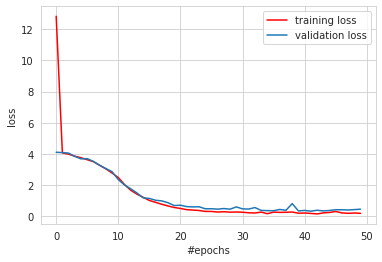

In [18]:
#plotting the validation and training losses

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

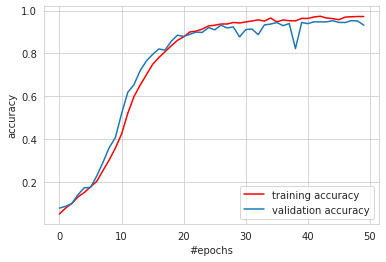

In [19]:
#plotting validation and training accuracy

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [20]:
#labels of our images
classes = ['ALL MOTOR VEHICLES PROHIBITED', 'AXLE LOAD LIMIT', 'BULLOCK CART PROHIBITED', 'BULLOCK CART _ CART PROHIBITED', 'Barrier Ahead', 'COMPULSORY AHEAD ONLY', 'COMPULSORY CYCLE TRACK', 'COMPULSORY KEEP LEFT', 'COMPULSORY SOUND HORN', 'COMPULSORY TURN LEFT', 'COMPULSORY TURN RIGHT', 'CYCLE PROHIBITED', 'Cross Road', 'Dangerous Dip', 'Falling Rocks', 'Ferry', 'GIVE WAY', 'Gap In Median', 'Guarded Level Crossing(200 Metres)', 'Guarded Level Crossing(50-100 Metres)', 'HANDCARTS PROHIIBITED', 'HEIGHT LIMIT', 'HORN PROHIBITED', 'Hump or Rough Road', 'LEFT TURN PROHIBITED', 'LENGTH LIMIT', 'LOAD LIMIT', 'Major Road Ahead', 'NO ENTRY,STRAIGHT PROHIBITED', 'NO PARKING', 'NO STOPPING', 'ONE WAY', 'OVERTAKING PROHIBITED', 'PEDESTRIANS PROHIBITED', 'RESTRICTION ENDS', 'RIGHT TURN PROHIBITED', 'Roundabout', 'SPEED LIMIT', 'STOP', 'Side Road Left', 'Side Road Right', 'Staggered Intersection', 'T-Intersection', 'TONGAS PROHIBITED', 'TRUCK PROHIBITED', 'U TURN PROHIBITED', 'Unguarded Level Crossing (50-100 Metres)', 'Unguarded Level Crossing(200 Metres)', 'VEHICLE PROHIBITED IN BOTH DIRECTIONS', 'WIDTH LIMIT', 'Y-Intersection', 'cattle', 'compulsory ahead or turn left', 'compulsory ahead or turn right', 'compulsory turn left ahead', 'compulsory turn right ahead', 'cycle crossing', 'left hair pin bend', 'left hand curve', 'left reverse bend', 'loose gravel', 'men at work', 'narrow bridge', 'narrow road ahead', 'pedestrian crossing', 'right hair pin bend', 'right hand curve', 'right reverse bend', 'road wideness ahead', 'school ahead', 'slippery road', 'steep ascent', 'steep descent']

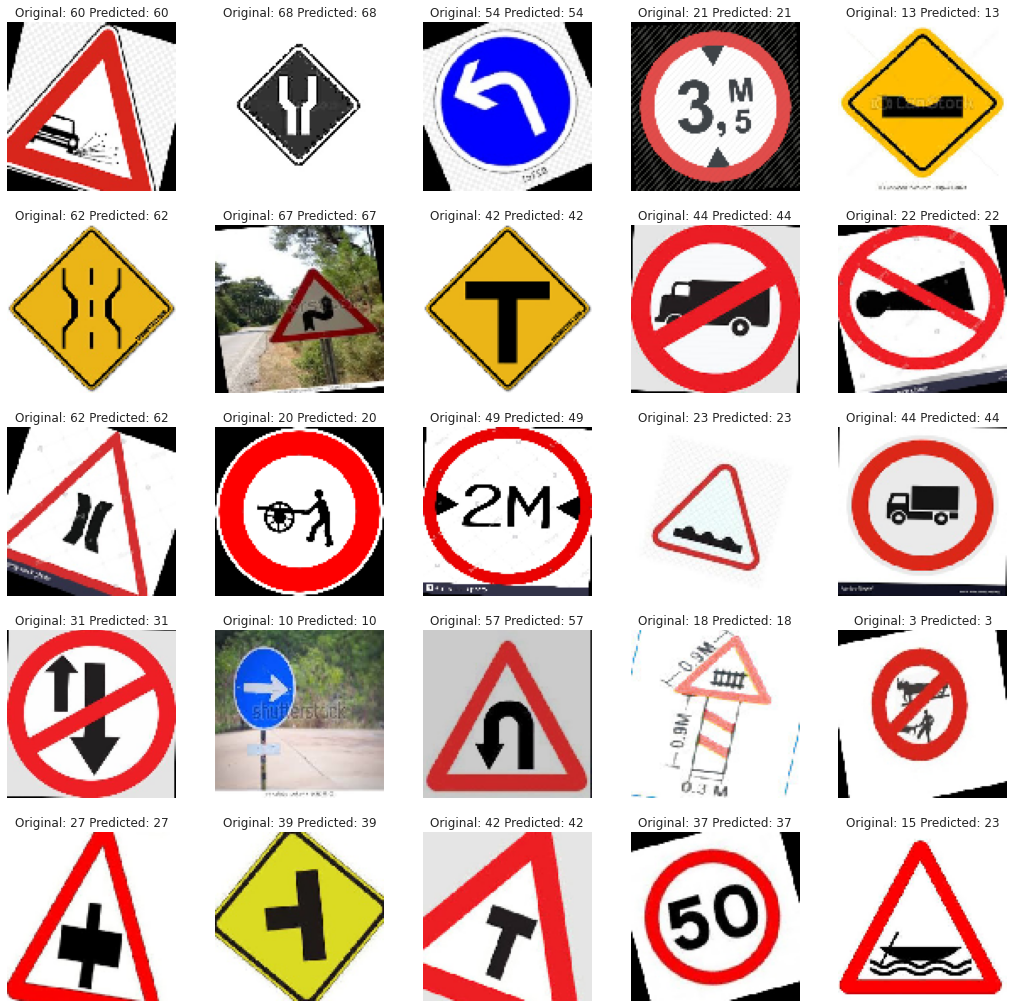

In [22]:
#plotting predictions
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    true = classes[np.argmax(y_test[r])]
    pred = classes[np.argmax(mode.predict((X_test[r].reshape(1, 100, 100, 3))))]
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]),np.argmax(mode.predict(X_test[r].reshape(1, 100, 100, 3)))))